<a href="https://colab.research.google.com/github/manchann/secure_project2/blob/main/kmean_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
dataset = pd.read_csv('/content/drive/MyDrive/BigData/04_hashed.csv')


Mounted at /content/drive


In [31]:
dataset_split = dataset

In [32]:
# IPv4 전처리
def transform_ip(ip): 
  groups = ip.split(".") 
  equalize_group_length = "".join( map( lambda group: group.zfill(3), groups )) 
  return equalize_group_length 

from sklearn.preprocessing import LabelEncoder

# Feature 전처리
def preprocess_df(df):
  
  # IPv4 전처리
  df['src_ip'] = df.src_ip.apply(lambda ip : transform_ip(ip))
  df['dst_ip'] = df.dst_ip.apply(lambda ip : transform_ip(ip))

  # country 전처리
  label_encoder = LabelEncoder()
  df['src_country'] = label_encoder.fit_transform(df['src_country'])
  df['dst_country'] = label_encoder.fit_transform(df['dst_country'])

  return df

In [33]:
dataset_ip = preprocess_df(dataset_split)

In [34]:
import numpy as np
arr = np.array(dataset_ip)
dataset_ip = pd.DataFrame(arr,columns=dataset_ip.columns)


In [35]:
from sklearn.preprocessing import LabelEncoder
job_encode = LabelEncoder()
dataset_ip['src_country'] = job_encode.fit_transform(dataset_ip['src_country'])
dataset_ip['dst_country'] = job_encode.fit_transform(dataset_ip['dst_country'])
dataset_ip.tail()

,Rdate,src_ip,dst_ip,Proto,src_port,dst_port,Action,src_country,dst_country
5820305,2.02104e+13,012150252150,102116052100,6,64259,445,2,121,224
5820306,2.02104e+13,012150252150,167212157124,6,64261,445,2,121,46
5820307,2.02104e+13,145217002097,072192214054,6,25646,23,2,47,116
5820308,2.02104e+13,154058159164,185151199060,6,54633,445,2,121,159
5820309,2.02104e+13,154058159020,180130243165,6,53644,445,2,121,47


In [36]:
from sklearn.cluster import KMeans
import numpy as np
X = dataset_ip
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_
print(kmeans)

KMeans(n_clusters=2, random_state=0)


In [37]:
y_km = kmeans.predict(X)

kmeans.cluster_centers_

array([[2.02104106e+13, 2.08234731e+11, 1.60814231e+11, 1.23696115e+01,
        5.02390635e+04, 9.08488212e+02, 1.39857263e+00, 1.20546508e+02,
        1.26871109e+02],
       [2.02104106e+13, 1.00655507e+11, 9.54822911e+10, 8.83029132e+00,
        5.01666084e+04, 2.82986305e+03, 1.71641245e+00, 1.11312724e+02,
        1.54176422e+02]])

               Rdate        src_ip  ... dst_country label
0        2.02104e+13  154058159102  ...         224     1
1        2.02104e+13  154058159020  ...          54     1
2        2.02104e+13  154058159164  ...         224     1
3        2.02104e+13  154058159165  ...         224     0
4        2.02104e+13  154058159102  ...         224     1
...              ...           ...  ...         ...   ...
5820305  2.02104e+13  012150252150  ...         224     1
5820306  2.02104e+13  012150252150  ...          46     1
5820307  2.02104e+13  145217002097  ...         116     1
5820308  2.02104e+13  154058159164  ...         159     0
5820309  2.02104e+13  154058159020  ...          47     0

[5820310 rows x 10 columns]


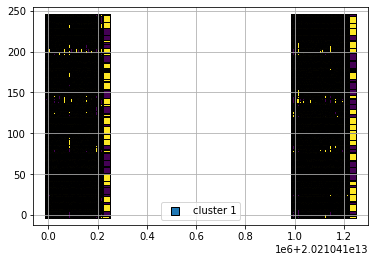

In [40]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

dataset_ip['label'] = kmeans.labels_

print(dataset_ip)


plt.scatter(
    dataset_ip['Rdate'], dataset_ip['dst_country'],
    s=50, c=dataset_ip['label'],
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()


# new_labels = kmeans.labels_

# Plot the identified clusters and compare with the answers
# plt.scatter(X[:, 0], X[:, 1], c=new_labels, s=150)